## Airplane Accident Prediction✈️
##### By Dishan Purkayastha

Importing Required Packages:

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

Importing The Dataset:

In [3]:
df=pd.read_csv('C:\\Users\devdi\Documents\DISHAN\Airplane-Accident-master\Airplane-Accident-master\AirplaneAccident.csv')

In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


Elementory Analysis Of Dataset:

In [7]:
flight = df.groupby('Severity')[['Accident_ID']].count()
flight =flight.sort_values('Accident_ID', ascending=False).reset_index()
flight.rename(columns = {'Accident_ID':'Accidents'},inplace=True)
flight

,Severity,Accidents
0,Highly_Fatal_And_Damaging,3049
1,Significant_Damage_And_Serious_Injuries,2729
2,Minor_Damage_And_Injuries,2527
3,Significant_Damage_And_Fatalities,1695


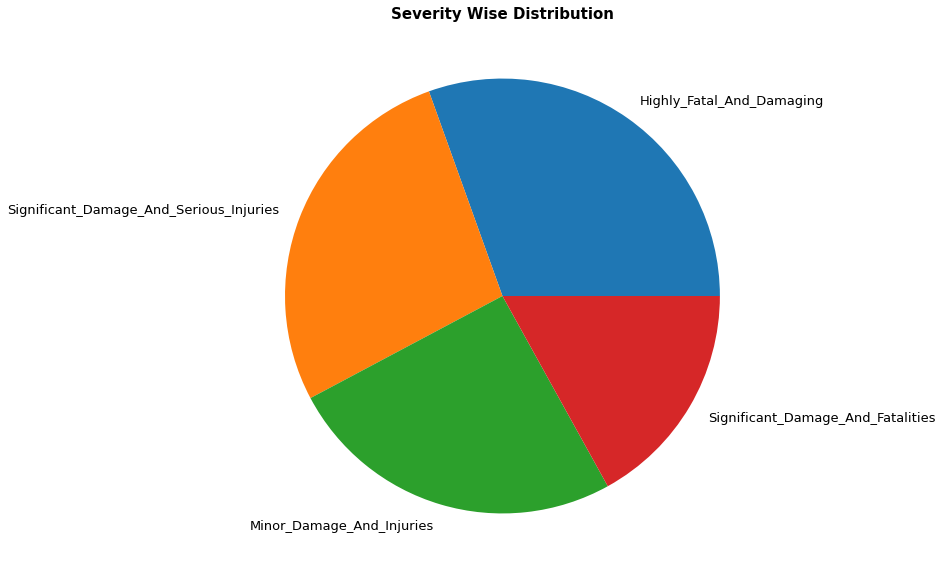

In [8]:
labels = list(flight.Severity)
plt.figure(figsize=(10,10))
plt.title("Severity Wise Distribution",fontweight='bold',fontsize=15)
plt.tick_params(labelsize=40)
plt.pie(flight.Accidents,labels=labels,textprops={'fontsize': 13});
plt.savefig('sev.png', dpi=300)

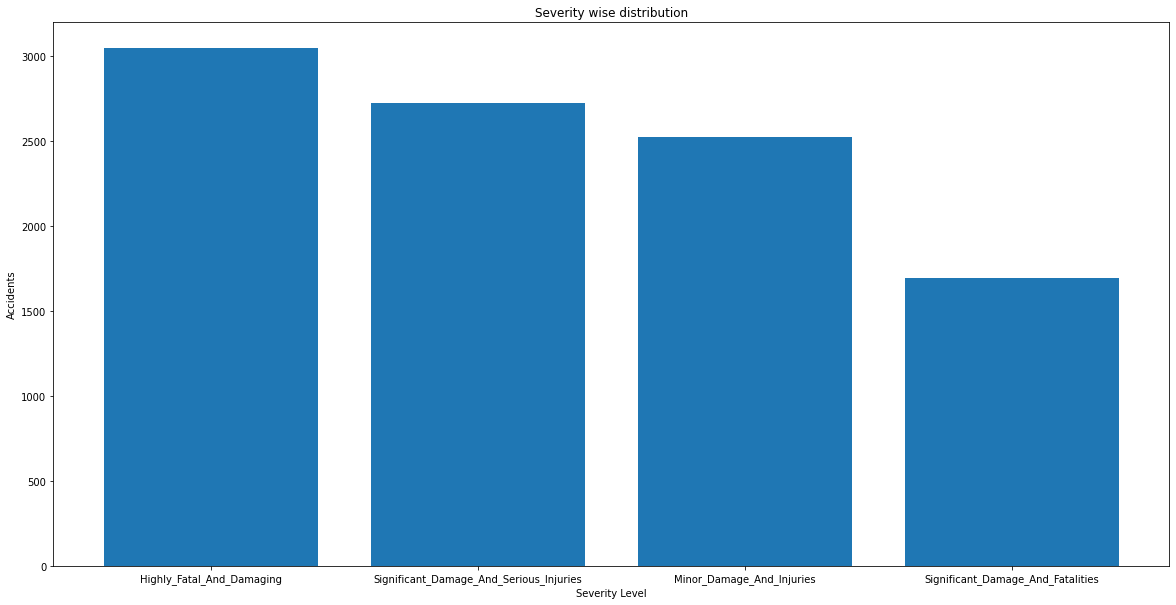

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel('Severity Level')
plt.ylabel('Accidents')
plt.title('Severity wise distribution');
plt.bar(flight.Severity,flight.Accidents);
plt.savefig('sev2.png', dpi=300)

In [11]:
df.tail(3)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,4963
9999,Highly_Fatal_And_Damaging,50.000000,13,3,45.487694,0.382467,77.46,5,26005.32299,2,0.017036,9387


In [13]:
flight = df.groupby('Total_Safety_Complaints')[['Accident_ID']].count()
flight =flight.sort_values('Accident_ID', ascending=False).reset_index()
flight.rename(columns = {'Accident_ID':'Accidents'},inplace=True)
flight

,Total_Safety_Complaints,Accidents
0,0,1281
1,1,1170
2,2,1058
3,3,886
4,4,659
5,5,629
6,7,565
7,6,560
8,8,414
9,9,324


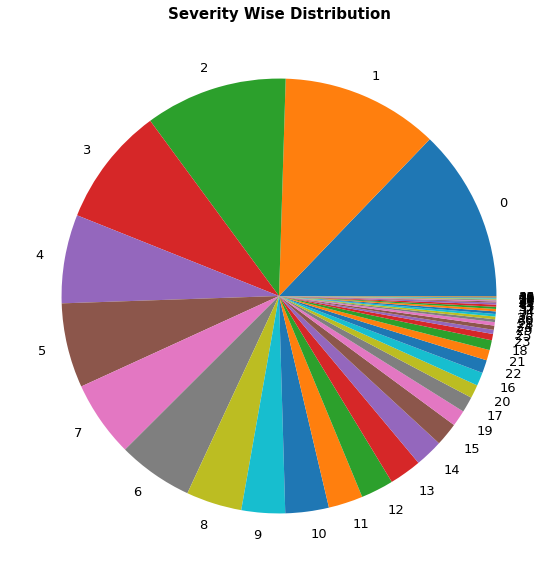

In [14]:
labels = list(flight.Total_Safety_Complaints)
plt.figure(figsize=(10,10))
plt.title("Severity Wise Distribution",fontweight='bold',fontsize=15)
plt.tick_params(labelsize=40)
plt.pie(flight.Accidents,labels=labels,textprops={'fontsize': 13});
plt.savefig('complaints.png', dpi=300)

Refining The dataset:

In [18]:
df.isnull().sum().sum()

0

Hence,there are no null values!

In [24]:
#Label encoding severity column and dropping airplane_id since it's irrelavnt:
le_Severity= LabelEncoder()
all_Severity = df.Severity
le_Severity.fit(all_Severity)

df['Severity'] = le_Severity.transform(df['Severity'])
df.drop(labels=['Accident_ID'],inplace=True,axis=1)

In [25]:
df.head(3)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364


In [27]:
#Dividing dataset into test and train sets:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [28]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [29]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.5859033272689496

In [34]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9996174853775097